# Data Preprocessing

## Import Libraries

In [2]:
# Define Numeriacl function
import numpy as np

# Define Dataframe Functions
import pandas as pd

# Define Data Vizulisation
import matplotlib.pyplot as plt
import seaborn as sns

# Define Model Building
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Importing DATA

In [5]:
df = pd.read_csv('./data./iris.csv')

## EDA

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
df.shape

(150, 6)

In [14]:
df.loc[50]

Id                            51
SepalLengthCm                7.0
SepalWidthCm                 3.2
PetalLengthCm                4.7
PetalWidthCm                 1.4
Species          Iris-versicolor
Name: 50, dtype: object

## Handling Missing Values

In [16]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Feature Engineering

In [20]:
np.sqrt(5.1)

2.258317958127243

In [22]:
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].apply(np.sqrt)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,2.258318,1.870829,1.183216,0.447214
1,2.213594,1.732051,1.183216,0.447214
2,2.167948,1.788854,1.140175,0.447214
3,2.144761,1.760682,1.224745,0.447214
4,2.236068,1.897367,1.183216,0.447214
...,...,...,...,...
145,2.588436,1.732051,2.280351,1.516575
146,2.509980,1.581139,2.236068,1.378405
147,2.549510,1.732051,2.280351,1.414214
148,2.489980,1.843909,2.323790,1.516575


In [24]:
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

# Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] = scaled_features

print(df)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1      -0.900681      1.032057      -1.341272     -1.312977        0
1      2      -1.143017     -0.124958      -1.341272     -1.312977        0
2      3      -1.385353      0.337848      -1.398138     -1.312977        0
3      4      -1.506521      0.106445      -1.284407     -1.312977        0
4      5      -1.021849      1.263460      -1.341272     -1.312977        0
..   ...            ...           ...            ...           ...      ...
145  146       1.038005     -0.124958       0.819624      1.447956        2
146  147       0.553333     -1.281972       0.705893      0.922064        2
147  148       0.795669     -0.124958       0.819624      1.053537        2
148  149       0.432165      0.800654       0.933356      1.447956        2
149  150       0.068662     -0.124958       0.762759      0.790591        2

[150 rows x 6 columns]


## Handling Outliers

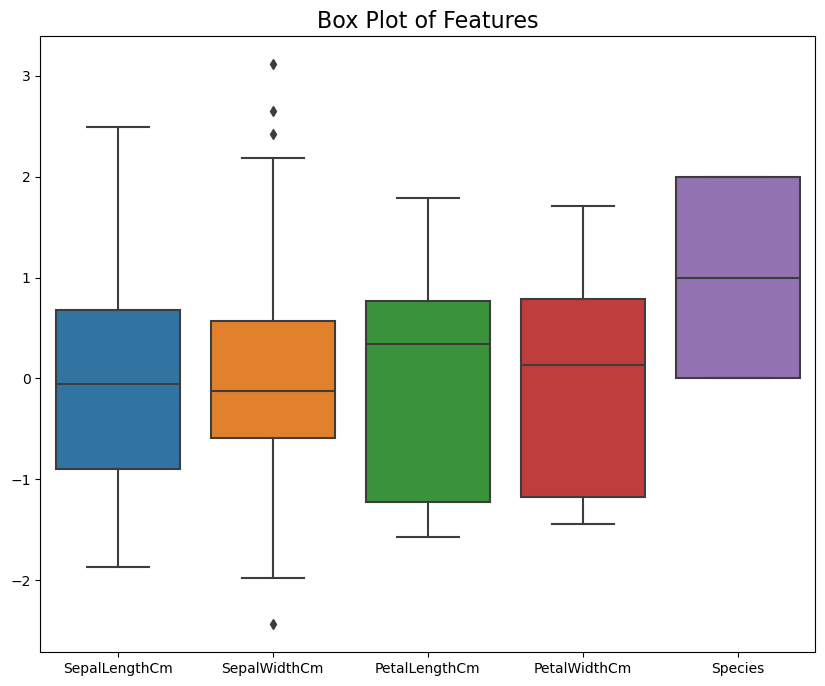

In [27]:
# Box Plot for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df.drop(columns=['Id']))
plt.title('Box Plot of Features', fontsize=16)
plt.show()

In [28]:
# Handling Outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.25)
Q3 = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] < lower_bound) |
            (df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']] > upper_bound)).any(axis=1)

# Remove outliers
df_cleaned = df[~outliers]

# Output the cleaned DataFrame
print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)
print(df_cleaned)

Original DataFrame shape: (150, 6)
Cleaned DataFrame shape: (146, 6)
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1      -0.900681      1.032057      -1.341272     -1.312977        0
1      2      -1.143017     -0.124958      -1.341272     -1.312977        0
2      3      -1.385353      0.337848      -1.398138     -1.312977        0
3      4      -1.506521      0.106445      -1.284407     -1.312977        0
4      5      -1.021849      1.263460      -1.341272     -1.312977        0
..   ...            ...           ...            ...           ...      ...
145  146       1.038005     -0.124958       0.819624      1.447956        2
146  147       0.553333     -1.281972       0.705893      0.922064        2
147  148       0.795669     -0.124958       0.819624      1.053537        2
148  149       0.432165      0.800654       0.933356      1.447956        2
149  150       0.068662     -0.124958       0.762759      0.790591        2

[146 rows x 6 colu

## Data Vizulisation

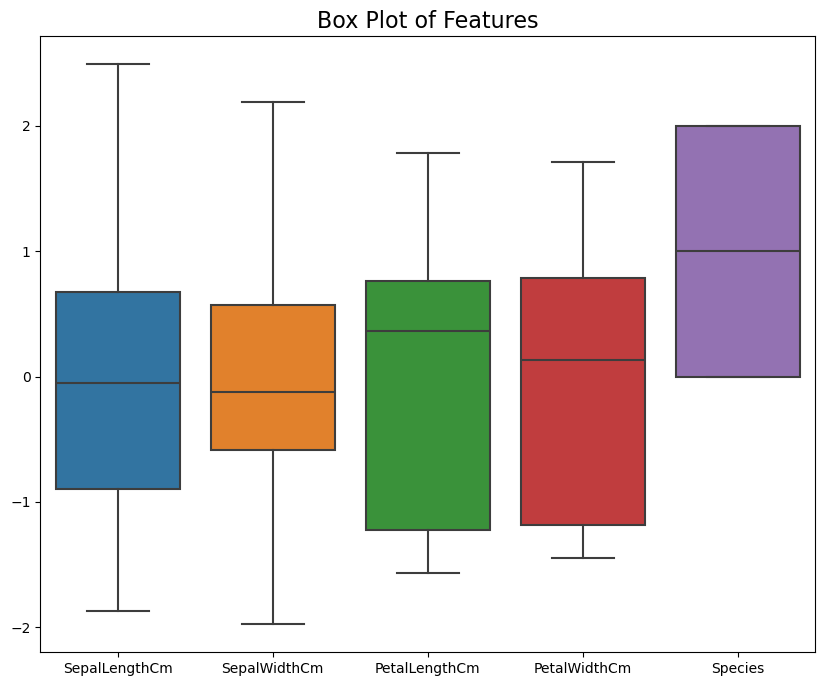

In [32]:
# Box Plot for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df_cleaned.drop(columns=['Id']))
plt.title('Box Plot of Features', fontsize=16)
plt.show()

## Train Test Split

In [35]:
# Train-Test Split
X = df_cleaned.drop(columns=['Id', 'Species'])
y = df_cleaned['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Initialization

In [38]:
model = KNeighborsClassifier(n_neighbors=3)

## Model Training

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Hyper Parameter tuning

## evaluation & Result:

In [45]:
# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Confussion Matrix: \n{confusion_matrix(y_pred, y_test)}")

Accuracy: 0.9333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

Confussion Matrix: 
[[12  0  0]
 [ 0  7  1]
 [ 0  1  9]]


In [47]:
# New data
new_data = {
    'Id': [16, 17],
    'SepalLengthCm': [6.1, 0.7],
    'SepalWidthCm': [3.5, 0.4],
    'PetalLengthCm': [5.4, 0.5],
    'PetalWidthCm': [3.2, 0.4]
}
new_df = pd.DataFrame(new_data)

# Drop the 'Id' column
new_X = new_df.drop(columns=['Id'])

# Apply the same scaler used for the training data
new_X_scaled = scaler.transform(new_X)

# Convert the scaled data back to a DataFrame
new_df_scaled = pd.DataFrame(new_X_scaled, columns=new_X.columns)

# Make predictions
new_predictions = model.predict(new_df_scaled)

# Convert numerical predictions back to original class labels
new_predictions_labels = label_encoder.inverse_transform(new_predictions)

# Add predictions to the new data
new_df['Species_Predicted'] = new_predictions_labels

print(new_df)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0  16            6.1           3.5            5.4           3.2   
1  17            0.7           0.4            0.5           0.4   

  Species_Predicted  
0    Iris-virginica  
1   Iris-versicolor  
